In [253]:
import shogilib
from shogilib import Position, H, W, BLANK, ptype_order
import shogilib.show_images

In [40]:
from shogilib import (
    Ptype,
    WHITE,
    BLACK,
    KING,
    H,
    W,
    Position,
    BLANK,
    ptype_order,
    Piece,
)

KPOS_COUNT = H * (W // 2) * (H * W - 1) + H * (H * (W + 1) // 2 - 1)
KPOS_COUNT

3276

In [2]:
for y in range(9):
    col = []
    for x in range(9):
        col.append(f"({x}, {y})")
        if x != 8:
            col.append("&")
        else:
            col.append("\\\\ \hline")
    print("".join(col))

(0, 0)&(1, 0)&(2, 0)&(3, 0)&(4, 0)&(5, 0)&(6, 0)&(7, 0)&(8, 0)\\ \hline
(0, 1)&(1, 1)&(2, 1)&(3, 1)&(4, 1)&(5, 1)&(6, 1)&(7, 1)&(8, 1)\\ \hline
(0, 2)&(1, 2)&(2, 2)&(3, 2)&(4, 2)&(5, 2)&(6, 2)&(7, 2)&(8, 2)\\ \hline
(0, 3)&(1, 3)&(2, 3)&(3, 3)&(4, 3)&(5, 3)&(6, 3)&(7, 3)&(8, 3)\\ \hline
(0, 4)&(1, 4)&(2, 4)&(3, 4)&(4, 4)&(5, 4)&(6, 4)&(7, 4)&(8, 4)\\ \hline
(0, 5)&(1, 5)&(2, 5)&(3, 5)&(4, 5)&(5, 5)&(6, 5)&(7, 5)&(8, 5)\\ \hline
(0, 6)&(1, 6)&(2, 6)&(3, 6)&(4, 6)&(5, 6)&(6, 6)&(7, 6)&(8, 6)\\ \hline
(0, 7)&(1, 7)&(2, 7)&(3, 7)&(4, 7)&(5, 7)&(6, 7)&(7, 7)&(8, 7)\\ \hline
(0, 8)&(1, 8)&(2, 8)&(3, 8)&(4, 8)&(5, 8)&(6, 8)&(7, 8)&(8, 8)\\ \hline


In [41]:
from shogilib.show_images import showstate

pos = shogilib.Position.from_fen(
    "9/+p3L1+l+SR/p+pl+n+P+Pp2/9/2+P4+p1/1+N1+n+P+p1+r+s/K3p2+Pg/1Gbs2+s2/2k7[pppPPPGLNgB] w"
)
showstate(pos)

3276

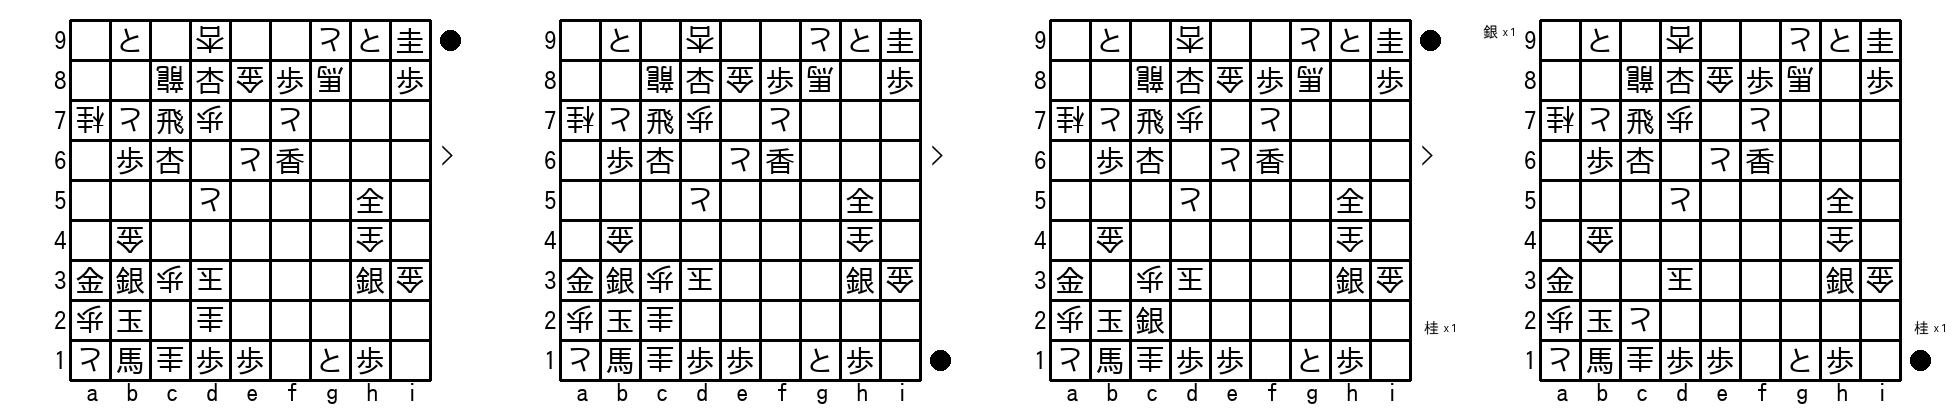

In [272]:
from shogilib.show_images import showstate, show_images_hv

#
fens = [
    "1+P1+l2+p+P+N/2+r+LgP+b1P/n+pRp1+p3/1P+L1+pL3/3+p3+S1/1g5+s1/GSpk3Sg/pK1+n5/+p+B+nPP1+PP1[] b",
    "1+P1+l2+p+P+N/2+r+LgP+b1P/n+pRp1+p3/1P+L1+pL3/3+p3+S1/1g5+s1/GSpk3Sg/pK+n6/+p+B+nPP1+PP1[] w",
    "1+P1+l2+p+P+N/2+r+LgP+b1P/n+pRp1+p3/1P+L1+pL3/3+p3+S1/1g5+s1/G1pk3Sg/pKS6/+p+B+nPP1+PP1[N] b",
    "1+P1+l2+p+P+N/2+r+LgP+b1P/n+pRp1+p3/1P+L1+pL3/3+p3+S1/1g5+s1/G2k3Sg/pK+p6/+p+B+nPP1+PP1[Ns] w",
]
show_images_hv(
    [showstate(Position.from_fen(fen)) for fen in fens], 4, filename="long_noreach.png"
)

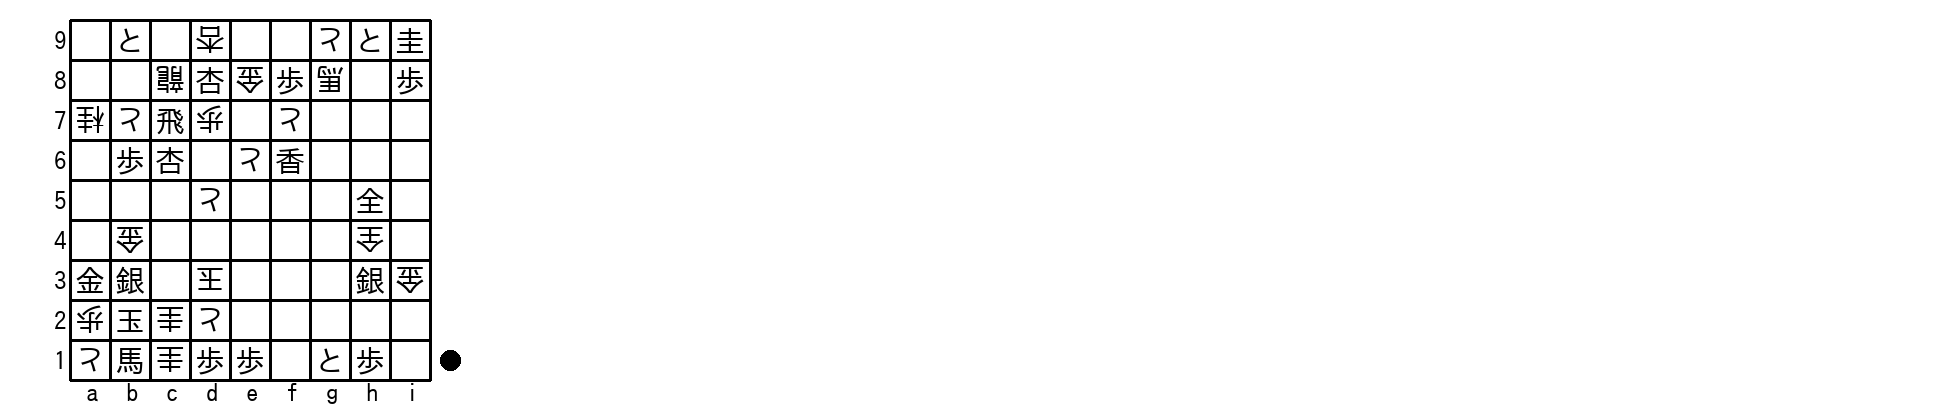

In [271]:
from shogilib import generate_previous_positions

fen = "1+P1+l2+p+P+N/2+r+LgP+b1P/n+pRp1+p3/1P+L1+pL3/3+p3+S1/1g5+s1/G2k3Sg/pKS+p5/+p+B+nPP1+PP1[N] b"
pos = Position.from_fen(fen)
fens = [p.fen() for p in generate_previous_positions(pos)]
show_images_hv([showstate(Position.from_fen(fen)) for fen in fens], 4)

In [262]:
from shogilib.show_images import showstate

pos = shogilib.Position.from_fen(
    "1+P1+l2+p+P+N/2+r+LgP+b1P/n+pRp1+p3/1P+L1+pL3/3+p3+S1/1g5+s1/G2k3Sg/pK+p6/+p+B+nPP1+PP1"
)
assert pos.is_consistent()
assert not pos.illegal()
showstate(pos, filename="sample_pos2rank.png")

Exception: fen format error : fen=1+P1+l2+p+P+N/2+r+LgP+b1P/n+pRp1+p3/1P+L1+pL3/3+p3+S1/1g5+s1/G2k3Sg/pK+p6/+p+B+nPP1+PP1

In [250]:
from collections import Counter
from shogilib import ptype_order, Player, H, W


def rep_pos(pos):
    hands = pos.hands
    hc = [Counter(hands[0]), Counter(hands[1])]
    # print(f'hc={hc}')
    rep_h = [(0, 0)]
    for i in range(1, 8):
        pt = ptype_order[i]
        rep_h.append([0] * 2)
        for player in range(2):
            rep_h[-1][player] = hc[player].get(pt, 0)
        rep_h[-1] = tuple(rep_h[-1])
    rep_h = tuple(rep_h)
    # print(f'rep_h={rep_h}')
    onboards = [[[] for _ in range(4)] for _ in range(8)]
    positions = []
    for x in range(W):
        for y in range(H):
            positions.append((x, y))
            piece = pos.board[y][x]
            if piece != BLANK:
                pt = piece.ptype()
                base_pt = pt.unpromote_if()
                i = ptype_order.index(base_pt)
                promote_index = 0 if pt.is_promoted() else 1
                pl = piece.player().value
                onboards[i][promote_index * 2 + pl].append((x, y))
    rep_b = tuple(tuple([] for _ in range(4)) for _ in range(8))
    for i in range(8):
        for j in range(4):
            for pos in onboards[i][j]:
                k = positions.index(pos)
                rep_b[i][j].append(k)
            for pos in onboards[i][j]:
                k = positions.index(pos)
                positions.pop(k)
    return (rep_h, rep_b)

In [109]:
rep_pos(pos)

hc=[Counter({<Ptype.BASIC_MIN: 2>: 3, <Ptype.GOLD: 8>: 1, <Ptype.KNIGHT: 4>: 1, <Ptype.LANCE: 3>: 1, <Ptype.BISHOP: 6>: 1}), Counter({<Ptype.BASIC_MIN: 2>: 3, <Ptype.GOLD: 8>: 1})]
rep_h=((0, 0), (1, 1), (1, 0), (1, 0), (3, 3), (0, 0), (0, 0), (1, 0))


(((0, 0), (1, 1), (1, 0), (1, 0), (3, 3), (0, 0), (0, 0), (1, 0)),
 (([], [], [6], [25]),
  ([], [], [15], [75]),
  ([13], [25, 28], [], []),
  ([], [49], [31], [17]),
  ([18, 30, 33, 39, 60], [1, 10, 38, 54], [], [1, 29, 40]),
  ([45], [42, 55], [], [23]),
  ([], [45], [48], []),
  ([], [], [], [17])))

In [237]:
from collections import defaultdict
from rank import (
    l2key,
    hb2oms,
    nopromote2comb_table,
    canpromote2comb_table,
    piece_pos2rank,
    comb_table_pre,
)


def piece_pos2rank(pc, empties, posls):
    ans = 0
    rest = len(empties)
    n_pieces = len(posls)
    empty_base = 0
    while n_pieces > 0:
        j = empties.index(posls[-n_pieces])
        v = comb_table_pre[rest - empty_base][n_pieces][j - empty_base]
        ans += v
        empties.pop(j)
        rest -= 1
        # print(f'rest={rest}, empty_base={empty_base}, n_pieces={n_pieces}, j={j}, v={v}, comb_table_pre[rest - empty_base][n_pieces] = {comb_table_pre[rest - empty_base][n_pieces]}')
        # ans += comb_table_pre[rest - empty_base][n_pieces][j - empty_base]

        empty_base = j
        n_pieces -= 1
    return ans


def l2rank(l):
    hands, onboards = l
    hands0 = defaultdict(int)
    for pt in hands[0]:
        hands0[pt] += 1
    pc2pos = defaultdict(list)
    for pc, pos in onboards:
        pc2pos[pc].append(pos)
    hbc = l2key(l)
    # for k in list(hb2oms.keys())[:10]:
    #    print(f'k={k}')
    # print(f'hbc={hbc}, l={l}')
    o, ms = hb2oms[hbc]
    ans = 0
    base = 1
    # hands
    for i in range(len(hbc[0])):
        pt, cnt = hbc[0][i]
        cnt1 = hands0.get(Ptype(pt), 0)
        ans += base * cnt1
        base *= cnt + 1
    # print(f'hand ans={ans}')
    handans, handbase = ans, base
    # kpos
    empties = list(range(H * W))
    j0 = pc2pos[Piece.W_KING][0]
    empties.pop(j0)
    j1 = empties.index(pc2pos[Piece.B_KING][0])
    empties.pop(j1)
    kpos = 0
    if j0 < H * (W // 2):
        kpos = j0 + j1 * H * (W // 2)
    elif j0 < H * (W // 2 + 1):
        kpos = H * (W // 2) * (H * W - 1) + (j0 % H) + j1 * H
    else:
        print(f"pc2pos={pc2pos}, j0={j0}, j1={j1}")
        raise ValueError(f"invalid king positions ")
    ans += base * kpos
    # print(f'kpos ans={ans}, ans0={(ans - handans) // handbase}')
    base *= KPOS_COUNT
    for i in range(len(hbc[1])):
        pt, cnt = hbc[1][i]
        pt = Ptype(pt)
        ptcounts = []
        posls = []
        for j in range(0, 2):  # j == 0 promoted, 1 not promoted
            for p in range(0, 2):  # p == 0 white, 1 black
                if j == 0 and not pt.can_promote():
                    ptcounts.append(0)
                    posls.append([])
                else:
                    pc = pt.to_piece([WHITE, BLACK][p])
                    if j == 0:
                        pc = pc.promote()
                    posl = pc2pos.get(pc, [])
                    ptcounts.append(len(posl))
                    posls.append(posl[:])
        ptcounts = tuple(ptcounts)
        n_empty = len(empties)
        if pt.can_promote():
            x, rank2comb, comb2rank = canpromote2comb_table[n_empty][cnt]
        else:
            x, rank2comb, comb2rank = nopromote2comb_table[n_empty][cnt]
        rank = comb2rank[ptcounts]
        in_rank = 0
        in_rank_base = 1
        for j in range(0, 2):  # j == 0 promoted, 1 not promoted
            for p in range(0, 2):  # p == 0 white, 1 black
                if ptcounts[j * 2 + p] == 0:
                    continue
                n_empty = len(empties)
                pc = pt.to_piece([WHITE, BLACK][p])
                if j == 0:
                    pc = pc.promote()
                v = piece_pos2rank(pc, empties, posls[j * 2 + p])
                in_rank += in_rank_base * v
                cb = comb(n_empty, len(posls[j * 2 + p]))
                # print(f'piece_pos2rank({pc}, {empties}, {posls[j * 2 + p]}) = {v}, cb={cb}, in_rank={in_rank}')
                in_rank_base *= comb(n_empty, len(posls[j * 2 + p]))
        ans += base * (rank + in_rank)
        # print(f'pt={pt}, ans={ans}, ans0={(ans - handans) // handbase}')
        base *= x
    return ans + o


def pos2l(pos):
    hands = pos.hands
    onboards = []
    for y in range(H):
        for x in range(W):
            if pos.board[y][x] != BLANK:
                onboards.append((pos.board[y][x], x * H + y))
    onboards.sort()
    return (hands, onboards)

In [238]:
from rank import pos2rank

pos2rank(pos)

55886199229708236745539580704294876784111070413396538952042043639247410

In [239]:
152338 % 2031

13

In [240]:
l = pos2l(pos)
l2rank(l)

55886199229708236745539580704294876784111070413396538952042043639247410

In [241]:
from rank import rank2pos

pos1 = rank2pos(55886199229708236745539580704294876784111070413396538952042043639247410)
assert pos1.fen() == pos.fen()

In [216]:
from functools import lru_cache

s = [2, 4, 4, 4, 18, 4, 2, 2]


@lru_cache(None)
def B(i, n):
    ans = []
    if i == 0:
        return [(0, 0, 1, 1)]
    elif i == 1:
        for i in range(n + 1):
            ans.append((0, 0, i, n - i))
        return ans
    for i in range(n + 1):
        for j in range(n + 1 - i):
            for k in range(n + 1 - i - j):
                ans.append((i, j, k, n - i - j - k))
    return ans


def H_sub(ans, i, cur):
    if i == 8:
        ans.append(tuple(cur))
        return
    for j in range(s[i] + 1):
        cur.append(j)
        H_sub(ans, i + 1, cur)
        cur.pop()


@lru_cache(None)
def H_fun():
    ans = []
    H_sub(ans, 1, [0])
    return ans


@lru_cache(None)
def comb(n, m):
    m = min(m, n - m)
    ans = 1
    div = 1
    for i in range(m):
        ans *= n - i
        div *= i + 1
    return ans // div


@lru_cache(None)
def N_hand(h):
    ans = 1
    for x in h:
        ans *= x + 1
    return ans


@lru_cache(None)
def N_comb(e, bi):
    ans = 1
    for x in bi:
        ans *= comb(e, x)
        e -= x
    return ans


@lru_cache(None)
def N_btype(h, i):
    if i == 0:
        return 3276
    ans = 0
    for bi in B(i, s[i] - h[i]):
        ans += N_comb(81 - sum(s[j] - h[j] for j in range(i)), bi)
    return ans


@lru_cache(None)
def N_board(h):
    ans = 1
    for i in range(8):
        ans *= N_btype(h, i)
    return ans


@lru_cache(None)
def N(h):
    return N_hand(h) * N_board(h)


@lru_cache(None)
def S_all():
    ans = 0
    for h in H():
        ans += N(h)
    return ans


@lru_cache(None)
def old_h(h):
    ans = []
    for i in range(8):
        if h[i] > 0:
            ans.append((i, h[i]))
    return ans

In [246]:
def R_pos(pos):
    hand, board = pos
    h = tuple(hand[i][0] + hand[i][1] for i in range(8))
    ans, other = 0, 0
    # print(f'h={h}')
    cnt, ok = 0, 0
    for h_ in H_fun():
        cnt += 1
        if old_h(h_) < old_h(h):
            ans += N(h_)
            ok += 1
        else:
            other += N(h_)
    # print(f'cnt={cnt}, ok={ok},ans={ans}, other={other}')
    ans += R_hand(hand, h)
    ans += R_board(board, h) * N_hand(h)
    return ans


def R_hand(hand, h):
    ans = 0
    prod = 1
    for i in range(1, 8):
        ans += hand[i][0] * prod
        prod *= h[i] + 1
    return ans


def R_board(board, h):
    ans = 0
    cur = 1
    for i in range(8):
        ans += R_btype(board, h, i) * cur
        # print(f'i={i}, ans={ans}')
        cur *= N_btype(h, i)
    return ans


def I_btype(board, h, i):
    e = 81
    for j in range(i):
        e -= s[j] - h[j]
    b_i = tuple(len(x) for x in board[i])
    ans = 0
    for b_ in B(i, s[i] - h[i]):
        if b_ < b_i:
            ans += N_comb(e, b_)
    return ans


def lt_empty(board, i, j):
    e = 81
    for i0 in range(i):
        for j0 in range(4):
            e -= len(board[i0][j0])
    for j0 in range(j):
        e -= len(board[i][j0])
    return e


def N_piece(board, i, j):
    # print(f'lt_empty={lt_empty(board, i, j)}, board[i][j]={board[i][j]}')
    return comb(lt_empty(board, i, j), len(board[i][j]))


def R_btype(board, h, i):
    if i == 0:
        if board[0][2][0] <= 35:
            return 36 * board[0][3][0] + board[0][2][0]
        else:
            return 80 * 36 + board[0][2][0] - 36 + 9 * board[0][3][0]
    ans = I_btype(board, h, i)
    # print(f'I_btype, ans={ans}')
    cur = 1
    for j in range(4):
        ans += R_piece(board, i, j) * cur
        cur *= N_piece(board, i, j)
        # print(f'ans={ans}, cur={cur}')
    return ans


def R_comb(m, p, k, i):
    if k == len(p):
        return 0
    ans = 0
    for l in range(i, p[k]):
        ans += comb(m - l - 1, len(p) - k - 1)
    ans += R_comb(m, p, k + 1, p[k] + 1)
    return ans


def R_piece(board, i, j):
    e = lt_empty(board, i, j)
    return R_comb(e, board[i][j], 0, 0)

In [247]:
pos = shogilib.Position.from_fen(
    "9/+p3L1+l+SR/p+pl+n+P+Pp2/9/2+P4+p1/1+N1+n+P+p1+r+s/K3p2+Pg/1Gbs2+s2/2k7[pppPPPGLNgB] w"
)
rep = rep_pos(pos)
print(f"rep={rep}")
rank = l2rank(l)
print(f"rank={rank}")
# print(R_pos(rep))
hand, board = rep
h = tuple(hand[i][0] + hand[i][1] for i in range(8))
# print(f'board={board}')
# print(f'R_piece(board, 2, 0)={R_piece(board, 2, 0)}')
# print(f'R_piece(board, 2, 1)={R_piece(board, 2, 1)}')
# print(f'r_byte(board, h, 2)={R_btype(board, h, 2)}')


print(R_pos(rep))

hc=[Counter({<Ptype.BASIC_MIN: 2>: 3, <Ptype.GOLD: 8>: 1, <Ptype.KNIGHT: 4>: 1, <Ptype.LANCE: 3>: 1, <Ptype.BISHOP: 6>: 1}), Counter({<Ptype.BASIC_MIN: 2>: 3, <Ptype.GOLD: 8>: 1})]
rep_h=((0, 0), (1, 1), (1, 0), (1, 0), (3, 3), (0, 0), (0, 0), (1, 0))
rep=(((0, 0), (1, 1), (1, 0), (1, 0), (3, 3), (0, 0), (0, 0), (1, 0)), (([], [], [6], [25]), ([], [], [15], [75]), ([13], [25, 28], [], []), ([], [49], [31], [17]), ([18, 30, 33, 39, 60], [1, 10, 38, 54], [], [1, 29, 40]), ([45], [42, 55], [], [23]), ([], [45], [48], []), ([], [], [], [17])))
rank=55886199229708236745539580704294876784111070413396538952042043639247410
55886199229708236745539580704294876784111070413396538952042043639247410


In [252]:
# 10000局面でのテスト
with open("reach_OK.txt") as f:
    lno = 0
    for l in f:
        pos = shogilib.Position.from_fen(l)
        rank0 = l2rank(pos2l(pos))
        rep = rep_pos(pos)
        rank1 = R_pos(rep)
        assert rank0 == rank1
        if lno % 100 == 0:
            print(f"lno={lno}")
        lno += 1
        if lno >= 10000:
            break

lno=0
lno=100
lno=200
lno=300
lno=400
lno=500
lno=600
lno=700
lno=800
lno=900
lno=1000
lno=1100
lno=1200
lno=1300
lno=1400
lno=1500
lno=1600
lno=1700
lno=1800
lno=1900
lno=2000
lno=2100
lno=2200
lno=2300
lno=2400
lno=2500
lno=2600
lno=2700
lno=2800
lno=2900
lno=3000
lno=3100
lno=3200
lno=3300
lno=3400
lno=3500
lno=3600
lno=3700
lno=3800
lno=3900
lno=4000
lno=4100
lno=4200
lno=4300
lno=4400
lno=4500
lno=4600
lno=4700
lno=4800
lno=4900
lno=5000
lno=5100
lno=5200
lno=5300
lno=5400
lno=5500
lno=5600
lno=5700
lno=5800
lno=5900
lno=6000
lno=6100
lno=6200
lno=6300
lno=6400
lno=6500
lno=6600
lno=6700
lno=6800
lno=6900
lno=7000
lno=7100
lno=7200
lno=7300
lno=7400
lno=7500
lno=7600
lno=7700
lno=7800
lno=7900
lno=8000
lno=8100
lno=8200
lno=8300
lno=8400
lno=8500
lno=8600
lno=8700
lno=8800
lno=8900
lno=9000
lno=9100
lno=9200
lno=9300
lno=9400
lno=9500
lno=9600
lno=9700
lno=9800
lno=9900


In [123]:
rep

(((0, 0), (1, 1), (1, 0), (1, 0), (3, 3), (0, 0), (0, 0), (1, 0)),
 (([], [], [6], [25]),
  ([], [], [15], [75]),
  ([13], [25, 28], [], []),
  ([], [49], [31], [17]),
  ([18, 30, 33, 39, 60], [1, 10, 38, 54], [], [1, 29, 40]),
  ([45], [42, 55], [], [23]),
  ([], [45], [48], []),
  ([], [], [], [17])))